In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [46]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/파이널프로젝트_RAW_210329_210926.csv", encoding='cp949')
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


In [47]:
data.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      105419 non-null  int64  
 1   customer_id             105416 non-null  float64
 2   course_id               100212 non-null  float64
 3   type                    105419 non-null  object 
 4   state                   105419 non-null  object 
 5   course_title            105403 non-null  object 
 6   category_title          105395 non-null  object 
 7   format                  105403 non-null  object 
 8   completed_at            105419 non-null  object 
 9   transaction_amount      105419 non-null  int64  
 10  coupon_title            31817 non-null   object 
 11  coupon_discount_amount  31817 non-null   float64
 12  sale_price              104291 non-null  float64
 13  tax_free_amount         104291 non-null  float64
 14  pg                  

In [49]:
data['method'].value_counts()

CARD            66380
VBANK            8540
POINT            8084
PROMOTION        4733
TRANS            2732
TRANSFER         1247
ONSITE            599
VOUCHER             5
B2B_CONTRACT        3
Name: method, dtype: int64

In [50]:
data['pg'].value_counts()

INICIS    60087
KAKAO     17249
NAVER      8045
PAYCO      4642
CHAI        321
Name: pg, dtype: int64

In [51]:
data['pg'].value_counts()

INICIS    60087
KAKAO     17249
NAVER      8045
PAYCO      4642
CHAI        321
Name: pg, dtype: int64

In [52]:
data['type'].value_counts()

PAYMENT        61433
ORDER          40159
REFUND          3824
TRANSACTION        3
Name: type, dtype: int64

In [53]:
data['state'].value_counts()

COMPLETED    62763
CANCELLED    41279
PENDING       1144
DELETED        219
REQUESTED       14
Name: state, dtype: int64

In [54]:
data.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

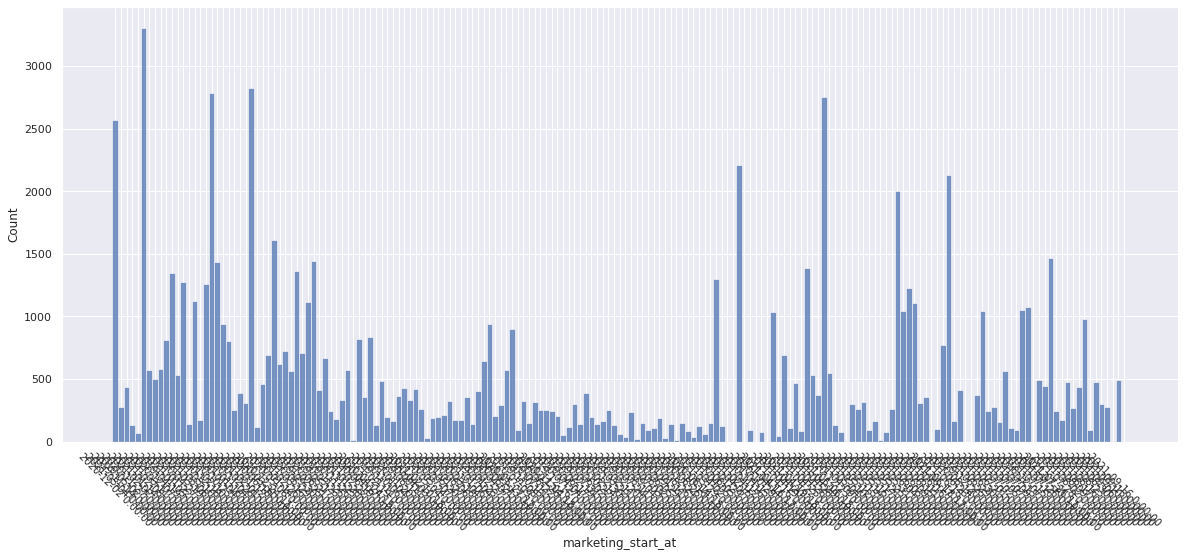

In [55]:
plt.figure(figsize=(20,8))
sns.histplot(data= data,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

In [56]:
combine_course_coupon = data[['course_title','coupon_title']]
combine_course_coupon

,course_title,coupon_title
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,NaN
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,NaN
2,시크릿코드 : 프론트엔드 실무 완성편,[10% 할인] 시크릿코드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,NaN
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰
...,...,...
105414,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105415,부동산 디벨로퍼 아카데미 : 인허가,NaN
105416,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105417,부동산 디벨로퍼 아카데미 : 인허가,NaN


In [66]:
data[data['method'].isna()]['customer_id'].unique()

array([147114., 167967., 485705., ...,  37866., 623392.,  87331.])

In [75]:
data2 = data.copy()

In [76]:
data2['payment_data']= data['pg'] + ' ' + data['method']

In [77]:
data2['payment_data'].unique()

array([nan, 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK', 'KAKAO CARD',
       'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD', 'PAYCO POINT',
       'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS', 'NAVER POINT',
       'PAYCO TRANSFER'], dtype=object)

In [78]:
data2['pg'] = data2['pg'].fillna('PG')
data2['pg'].unique()

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [79]:
data2['method'] = data2['method'].fillna('')

In [80]:
data2['payment_data']= data2['pg'] + ' ' + data2['method']

In [81]:
data2.drop(['pg', 'method'], axis=1, inplace=True)

In [82]:
data2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,개발자 커리어,NaN,PG VBANK
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,영상 편집,2020-12-02 0:00:00,PG CARD
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,2021-03-04 0:00:00,PG CARD
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,2021-03-04 0:00:00,PG CARD
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PPT/보고서,2019-11-14 0:00:00,PG CARD


In [83]:
data2['payment_data'].unique()

array(['PG VBANK', 'PG CARD', 'PG TRANS', 'PG PROMOTION', 'PG TRANSFER',
       'PG ONSITE', 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK',
       'PG B2B_CONTRACT', 'KAKAO ', 'CHAI ', 'PAYCO ', 'NAVER ',
       'KAKAO CARD', 'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD',
       'PAYCO POINT', 'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS',
       'PG VOUCHER', 'NAVER POINT', 'PAYCO TRANSFER'], dtype=object)